# Tenor saxophone

### Determine how many PCA components is a good number of components

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
NUM_LABEL_COLS = 13
df = pd.read_pickle('./data/5s/labeled/features_r02/all_data.pkl')

In [6]:
df.shape

(9080, 10790)

In [8]:
df_filtered = df  # In case we ever want to go back to df later

In [10]:
# exclude records we want to exclude
df_filtered = df_filtered[df_filtered['alto'] == '0'] 
df_filtered = df_filtered[df_filtered['sop'] == '0']
df_filtered = df_filtered[df_filtered['bari'] == '0']
df_filtered = df_filtered[df_filtered['clrt'] == '0']
df_filtered = df_filtered[df_filtered['tora'] == '0']
df_filtered = df_filtered[df_filtered['othr'] == '0']
df_filtered = df_filtered[df_filtered['trmp'] == '0']
df_filtered = df_filtered[df_filtered['trmb'] == '0']
df_filtered = df_filtered[df_filtered['otrb'] == '0']

num_x_cols = df_filtered.shape[1] - NUM_LABEL_COLS
data = df_filtered.iloc[:, 1:num_x_cols]
data.head()

,zeros,mfcc_0_0,mfcc_0_1,mfcc_0_2,mfcc_0_3,mfcc_0_4,mfcc_0_5,mfcc_0_6,mfcc_0_7,mfcc_0_8,...,spf_421,spf_422,spf_423,spf_424,spf_425,spf_426,spf_427,spf_428,spf_429,spf_430
0,8822,-262.535278,-264.593231,-264.253876,-258.306427,-180.095154,-104.992142,-74.136917,-74.703041,-76.241982,...,0.001430,0.001346,0.001204,0.001338,0.001250,0.000991,0.000981,0.000927,0.000976,0.001391
1,8955,-143.286331,-154.023926,-165.027695,-171.412842,-174.109100,-180.226807,-184.423111,-184.438721,-183.394211,...,0.000144,0.000137,0.000138,0.000165,0.000141,0.000152,0.000184,0.000188,0.000167,0.000233
2,13521,-206.313293,-211.238693,-214.663116,-219.083893,-227.416504,-229.910263,-225.391541,-237.068161,-211.324493,...,0.012125,0.064592,0.078296,0.038886,0.022147,0.005891,0.002781,0.001723,0.001303,0.001412
4,7409,-267.150269,-253.300064,-247.216202,-221.871307,-197.881393,-192.183762,-182.843277,-195.540207,-210.298828,...,0.002821,0.001883,0.001503,0.002193,0.001398,0.000972,0.001373,0.012552,0.035475,0.028941
6,50335,-207.954041,-179.768509,-160.229919,-134.485260,-114.281403,-115.541260,-127.908066,-141.705505,-152.111191,...,0.095932,0.138150,0.174189,0.136801,0.114661,0.116422,0.088011,0.155853,0.119799,0.044120


In [11]:
data = data.to_numpy() 
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

target = df_filtered[['tenr']].to_numpy().ravel()
# ^ this is the label
target.shape

(6434,)

In [12]:
xs = [n for n in range(4, 60, 1)]
ys = []
for x in xs:
    pca = PCA(n_components=x)
    pca.fit(data)
    d = pca.transform(data)
    x_train, x_test, y_train, y_test = \
        train_test_split(d, target, test_size=0.20, random_state=0)
    clf = SVC()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    ys.append(clf.score(x_test, y_test))
    

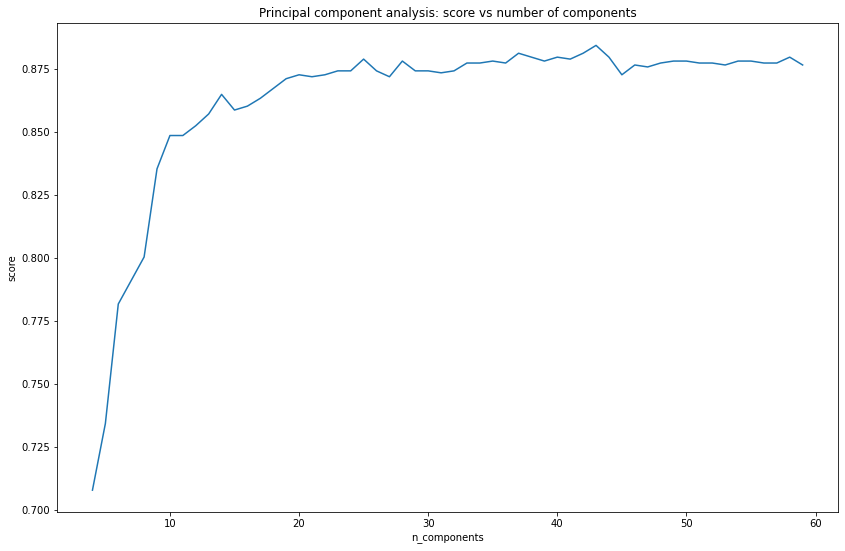

In [13]:
fig = plt.figure(figsize=(14, 9))    
plt.plot(xs, ys)
plt.xlabel('n_components')
plt.ylabel('score')
plt.title("Principal component analysis: score vs number of components")
pass


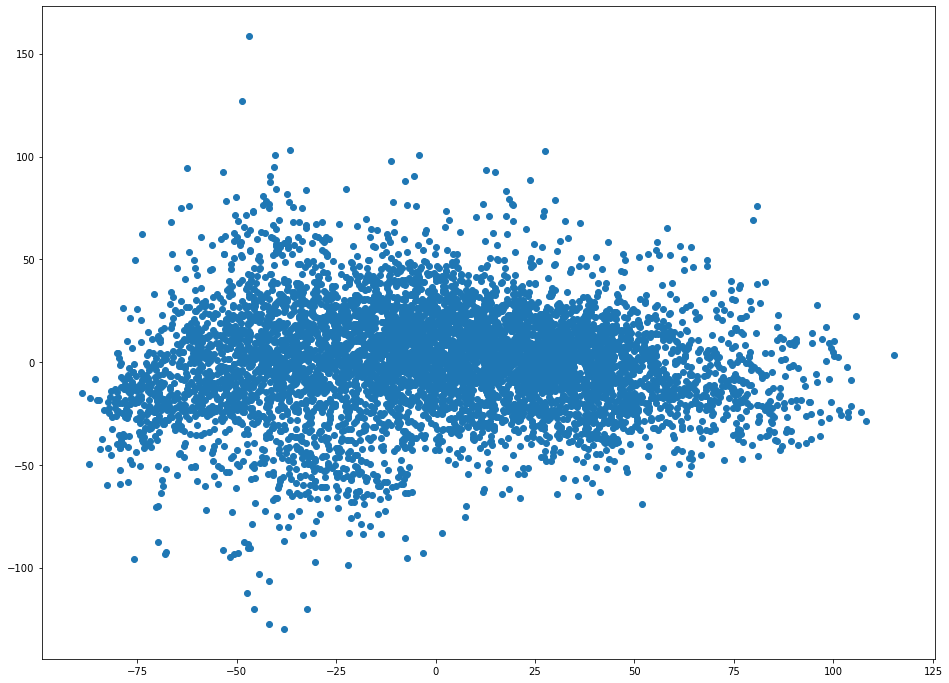

In [14]:
reduced_data = PCA(n_components=2).fit_transform(data)
fig = plt.figure(figsize=(16, 12))
s = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=None)

In [15]:
pca = PCA()
pca.fit(data)

PCA()

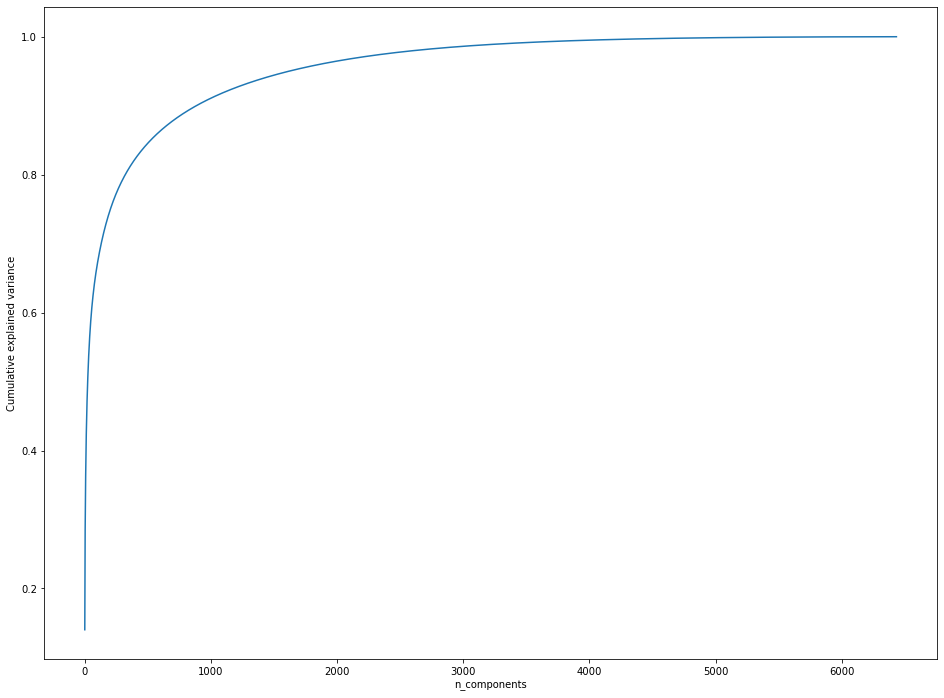

In [16]:
fig = plt.figure(figsize=(16, 12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n_components')
plt.ylabel('Cumulative explained variance');

In [21]:
pca = PCA(0.575).fit(data)
pca.n_components_

44